1. Importing libraries and data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# This option ensures that the graphs you create are displayed within the notebook without the need to "call" them specifically.

%matplotlib inline

In [3]:
path = r'C:\Users\honoc\Documents\CareerFoundry Folder\Advanced Analytics and Dashboard Design\Zomato Folder'
path
df = pd.read_csv(os.path.join(path, 'Original data', 'zomato.csv'), index_col = False)

2. Data Cleaning

In [4]:
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [5]:
df.shape

(51717, 17)

In [6]:
df.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

Dropping Columns not important for this project

In [7]:
df = df.drop(['url', 'address', 'phone', 'menu_item', 'dish_liked', 'reviews_list'], axis=1)

In [8]:
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),listed_in(type),listed_in(city)
0,Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8/5,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,Banashankari,Quick Bites,"South Indian, North Indian",300,Buffet,Banashankari
4,Grand Village,No,No,3.8/5,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,Buffet,Banashankari


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   name                         51717 non-null  object
 1   online_order                 51717 non-null  object
 2   book_table                   51717 non-null  object
 3   rate                         43942 non-null  object
 4   votes                        51717 non-null  int64 
 5   location                     51696 non-null  object
 6   rest_type                    51490 non-null  object
 7   cuisines                     51672 non-null  object
 8   approx_cost(for two people)  51371 non-null  object
 9   listed_in(type)              51717 non-null  object
 10  listed_in(city)              51717 non-null  object
dtypes: int64(1), object(10)
memory usage: 4.3+ MB


Checking for Mixed-type columns

In [10]:
for col in df.columns.tolist():
    weird = (df[[col]].applymap(type) != df[[col]].iloc[0].apply(type)).any(axis = 1)
    if len(df[weird]) > 0:
        print(col)

rate
location
rest_type
cuisines
approx_cost(for two people)


Checking for and dropping duplicates

In [11]:
df.drop_duplicates(inplace= True)

In [12]:
df.shape # 108 duplicates dropped

(51609, 11)

In [13]:
df['votes'].unique()

array([ 775,  787,  918, ..., 4957, 2382,  843], dtype=int64)

CLEANING UP THE MIXED-TYPE COLUMNS

STARTING WITH THE "rate" column. The "rate" is displayed as a fraction of 5. It has to be changed to a simple float value. That is, instead of 4.1/5, it should be 4.1. It could also possibly have other mixed-data types.

In [14]:
df['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', nan, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [15]:
def cleanrate(value):
    if(value=='NEW' or value=='-'):
        return np.nan
    else:
        value = str(value).split('/')
        value = value[0]
        return float(value)

In [16]:
df['rate'] = df['rate'].apply(cleanrate)

In [17]:
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),listed_in(type),listed_in(city)
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300,Buffet,Banashankari
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,Buffet,Banashankari


Checking for null values in "rate" column

In [18]:
df.rate.isnull().sum()

10019

In [19]:
df['rate'].fillna(df['rate'].mean(), inplace= True) # Filling the null values with the mean
df['rate'].isnull().sum()

0

Dropping Null Values for "location", "rest_type", "cuisines", and "approx_cost(for two people)". Reason: The Null Values are few and will not have a significant effect on the outcome of the Analysis.

In [20]:
df.dropna(inplace= True)
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),listed_in(type),listed_in(city)
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300,Buffet,Banashankari
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,Buffet,Banashankari


Renaming columns: "approx_cost(for two people)" to "Cost2plates", "listed_in(type)" to "Type"

In [21]:
df.rename(columns = {'approx_cost(for two people)':'Cost2plates', 'listed_in(type)':'Type'}, inplace = True)
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,Cost2plates,Type,listed_in(city)
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300,Buffet,Banashankari
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,Buffet,Banashankari


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 51042 entries, 0 to 51716
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             51042 non-null  object 
 1   online_order     51042 non-null  object 
 2   book_table       51042 non-null  object 
 3   rate             51042 non-null  float64
 4   votes            51042 non-null  int64  
 5   location         51042 non-null  object 
 6   rest_type        51042 non-null  object 
 7   cuisines         51042 non-null  object 
 8   Cost2plates      51042 non-null  object 
 9   Type             51042 non-null  object 
 10  listed_in(city)  51042 non-null  object 
dtypes: float64(1), int64(1), object(9)
memory usage: 4.7+ MB


Let’s look at the Unique values in “Cost2plates” as it is an integral part of this task

In [23]:
df['Cost2plates'].unique()

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '900', '200', '750', '150', '850', '100', '1,200', '350', '250',
       '950', '1,000', '1,500', '1,300', '199', '80', '1,100', '160',
       '1,600', '230', '130', '50', '190', '1,700', '1,400', '180',
       '1,350', '2,200', '2,000', '1,800', '1,900', '330', '2,500',
       '2,100', '3,000', '2,800', '3,400', '40', '1,250', '3,500',
       '4,000', '2,400', '2,600', '120', '1,450', '469', '70', '3,200',
       '60', '560', '240', '360', '6,000', '1,050', '2,300', '4,100',
       '5,000', '3,700', '1,650', '2,700', '4,500', '140'], dtype=object)

There are some values in “Cost2plates” with commas, and these restrict it the values from becoming integers or floats. So let’s convert that data types to integer.

In [24]:
import pandas as pd

def clean_cost2plates(value):
    try:
        # Remove commas and convert to integer
        cleaned_value = int(value.replace(',', ''))
        return cleaned_value
    except ValueError:
        # Handle cases where conversion to integer is not possible
        return None

# Assuming df_zomato is your DataFrame
df['Cost2plates'] = df['Cost2plates'].apply(clean_cost2plates)

In [25]:
df['Cost2plates'].unique()

array([ 800,  300,  600,  700,  550,  500,  450,  650,  400,  900,  200,
        750,  150,  850,  100, 1200,  350,  250,  950, 1000, 1500, 1300,
        199,   80, 1100,  160, 1600,  230,  130,   50,  190, 1700, 1400,
        180, 1350, 2200, 2000, 1800, 1900,  330, 2500, 2100, 3000, 2800,
       3400,   40, 1250, 3500, 4000, 2400, 2600,  120, 1450,  469,   70,
       3200,   60,  560,  240,  360, 6000, 1050, 2300, 4100, 5000, 3700,
       1650, 2700, 4500,  140], dtype=int64)

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 51042 entries, 0 to 51716
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             51042 non-null  object 
 1   online_order     51042 non-null  object 
 2   book_table       51042 non-null  object 
 3   rate             51042 non-null  float64
 4   votes            51042 non-null  int64  
 5   location         51042 non-null  object 
 6   rest_type        51042 non-null  object 
 7   cuisines         51042 non-null  object 
 8   Cost2plates      51042 non-null  int64  
 9   Type             51042 non-null  object 
 10  listed_in(city)  51042 non-null  object 
dtypes: float64(1), int64(2), object(8)
memory usage: 4.7+ MB


Extreme Values Checks

C:\Users\honoc\AppData\Local\Temp\ipykernel_13000\3404909241.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['votes'], bins=25) # Shows extreme values


<Axes: xlabel='votes', ylabel='Density'>

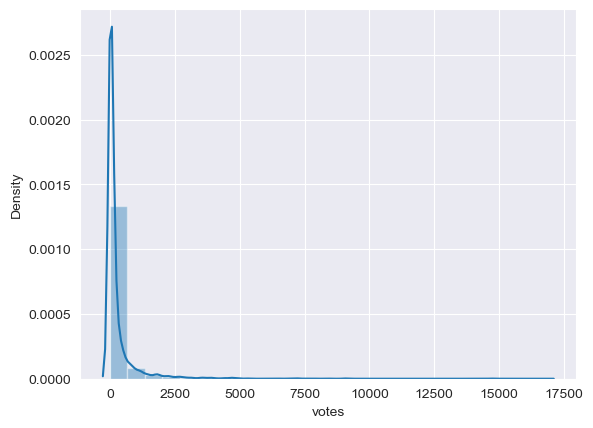

In [27]:
sns.distplot(df['votes'], bins=25) # Shows extreme values

C:\Users\honoc\AppData\Local\Temp\ipykernel_13000\689529137.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Cost2plates'], bins=25) # Shows extreme values


<Axes: xlabel='Cost2plates', ylabel='Density'>

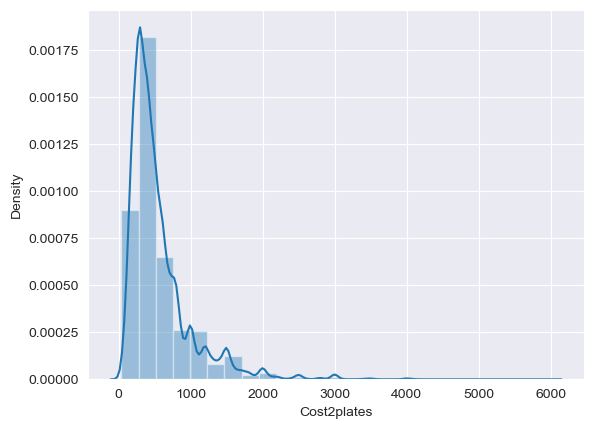

In [28]:
sns.distplot(df['Cost2plates'], bins=25) # Shows extreme values

In [29]:
df['votes'].mean() # Check mean

284.507699541554

In [30]:
df['Cost2plates'].mean()

555.782982641746

In [31]:
df['votes'].median() # Check median

41.0

In [32]:
df['Cost2plates'].median()

400.0

In [33]:
df['votes'].max()

16832

In [34]:
df['Cost2plates'].max()

6000

In [35]:
df['votes'].min()

0

In [36]:
df['Cost2plates'].min()

40

3. Data prep for regression analysis

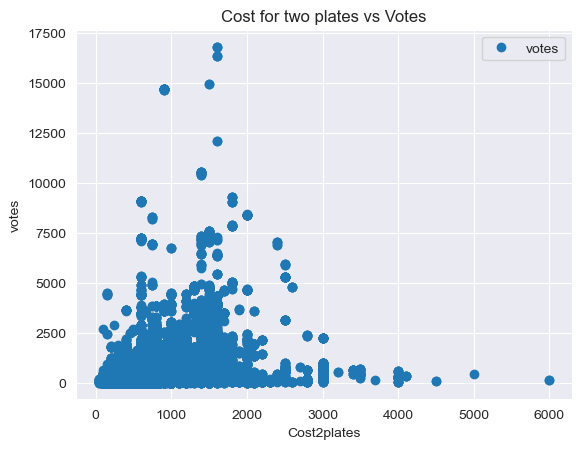

In [37]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df.plot(x = 'Cost2plates', y='votes',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Cost for two plates vs Votes')
plt.xlabel('Cost2plates')
plt.ylabel('votes')
plt.show()

In [65]:
df.to_csv(os.path.join(path, 'Prepared Data', 'zomato_scatterplot_first.csv'), index=False)

Hypothesis: If the approximate cost for two plates at Restaurants in Bengaluru is higher, then the total number of votes received by these restaurants tends to be higher.

In [38]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = df['Cost2plates'].values.reshape(-1,1)
y = df['votes'].values.reshape(-1,1)

In [39]:
X

array([[ 800],
       [ 800],
       [ 800],
       ...,
       [2000],
       [2500],
       [1500]], dtype=int64)

In [40]:
y

array([[775],
       [787],
       [918],
       ...,
       [  0],
       [236],
       [ 13]], dtype=int64)

In [41]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

4. Regression analysis

In [42]:
# Create a regression object.

regression = LinearRegression()  # This is the regression object, which will be fit onto the training set.

In [43]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [44]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

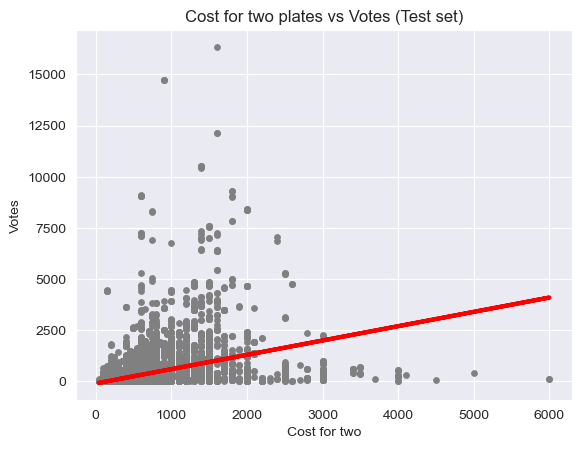

In [45]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Cost for two plates vs Votes (Test set)')
plot_test.xlabel('Cost for two')
plot_test.ylabel('Votes')
plot_test.show()

The analysis reveals a positive correlation between the cost of two plates at restaurants in Bengaluru and the number of votes, suggesting that higher establishments tend to attract more attention. Possible explanations include customers valuing a better dining experience, a restaurant's location or image, and the association of higher costs with a better reputation. Causation is cautiously approached, with recognition of potential third variables. Acknowledgment of outliers prompts consideration of data errors or unique restaurants characteristics.

In [46]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [47]:
# Print the model summary statistics. This is where you evaluate the performance of the model

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.7005945]]
Mean squared error:  551655.8461262041
R2 score:  0.14925785875801667


In [48]:
y_predicted

array([[ 103.73126739],
       [ 138.76099261],
       [1294.74192466],
       ...,
       [ 243.85016825],
       [  -1.35790825],
       [ 278.87989346]])

In [49]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,0,103.731267
1,15,138.760993
2,15,1294.741925
3,0,-36.387633
4,847,664.206871
5,0,33.671817
6,33,103.731267
7,6,173.790718
8,1176,68.701542
9,227,559.117695


The results of the machine learning model show a positive slope of approximately 0.70, indicating a positive relationship between the cost of two plates and the predicted number of votes. However, the relatively high mean squared error of 551,655.85 suggests a considerable level of prediction error. The R2 score of 0.15 indicates that the model explains only 15% of the variance, leaving room for improvement. These metrics collectively indicate that while there is discernible relationship, the model's predictive accuracy may be limited.

Compare how the regression fits the training set

In [50]:
# Predict.

y_predicted_train = regression.predict(X_train) # This is predicting X_train!

In [51]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [52]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.7005945]]
Mean squared error:  556840.3761844116
R2 score:  0.14324050617705586


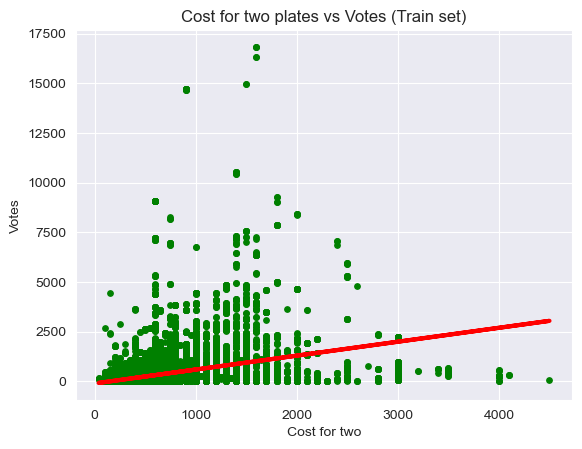

In [53]:
# Visualizing the training set results.

plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('Cost for two plates vs Votes (Train set)')
plot_test.xlabel('Cost for two')
plot_test.ylabel('Votes')
plot_test.show()

Checking performance after removing outliers

In [54]:
# Clean the extreme values from the "votes" variable observed during the consistency checks.

df_test = df[df['votes'] <=10000] 

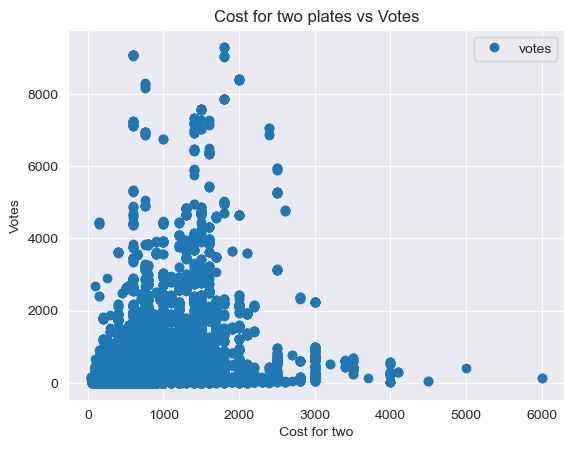

In [55]:
# See how the scatterplot looks without outliers.

df_test.plot(x = 'Cost2plates', y='votes', style='o')
plt.title('Cost for two plates vs Votes')
plt.xlabel('Cost for two')
plt.ylabel('Votes')
plt.show()

In [56]:
# Reshape again.

X_2 = df_test['Cost2plates'].values.reshape(-1,1)
y_2 = df_test['votes'].values.reshape(-1,1)

In [57]:
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2, y_2, test_size=0.3, random_state=0)

In [58]:
# Run and fit the regression.

regression = LinearRegression()
regression.fit(X_train_2, y_train_2)

LinearRegression()

In [59]:
# Predict.

y_predicted_2 = regression.predict(X_test_2)

In [60]:
rmse = mean_squared_error(y_test_2, y_predicted_2)
r2 = r2_score(y_test_2, y_predicted_2)

In [61]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.66780433]]
Mean squared error:  449065.098255912
R2 score:  0.15829924606818213


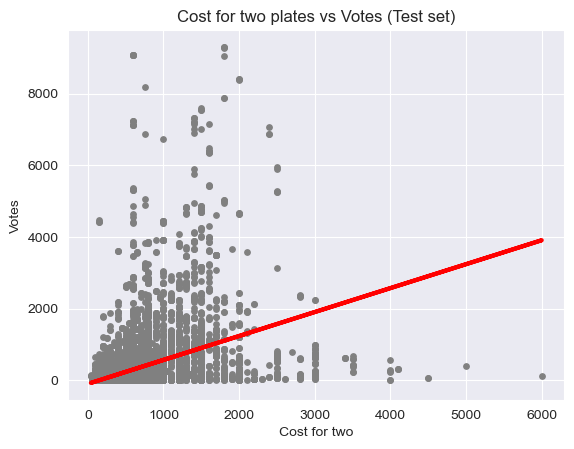

In [62]:
# Visualizing the test set results.
plot_test = plt
plot_test.scatter(X_test_2, y_test_2, color='gray', s = 15)
plot_test.plot(X_test_2, y_predicted_2, color='red', linewidth =3)
plot_test.title('Cost for two plates vs Votes (Test set)')
plot_test.xlabel('Cost for two')
plot_test.ylabel('Votes')
plot_test.show()

The Regression line shows some improvement with the removal of some outliers from the total number of votes.

In [63]:
data = pd.DataFrame({'Actual': y_test_2.flatten(), 'Predicted': y_predicted_2.flatten()})

In [64]:
data.head(50)

,Actual,Predicted
0,22,903.470995
1,0,102.105799
2,45,102.105799
3,424,2239.079655
4,151,168.886232
5,59,102.105799
6,537,202.276448
7,864,836.690562
8,7,35.325366
9,5024,1103.812294
